In [150]:
import joblib

In [151]:
import tensorflow as tf
import numpy as np
import math
import pandas as pd
from tensorflow.keras import layers
from tinymlgen import port
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt
import seaborn as sns
from keras import regularizers
from tensorflow.keras import initializers
import time

In [152]:
# Create a GaussianNoise layer with a specific standard deviation
from tensorflow.keras.layers import GaussianDropout, GaussianNoise, Lambda

In [153]:
# Custom function for quantization noise
def quantization_noise(x, num_bits=8):
    # Scale the values to the range [0, 2^num_bits - 1]
    scale = 2**num_bits - 1
    x_quantized = tf.round(x * scale) / scale
    return x_quantized

In [154]:
from tensorflow.keras.models import load_model

# Load the saved final model using TensorFlow's method
loaded_nn_model = load_model('quantization_gru_lstm_model')

In [155]:
#from tensorflow.keras.models import load_model

# Load the saved final model using TensorFlow's method
#loaded_final_model = load_model('final_model_nn_savedmodel')

In [185]:
import pandas as pd

# Load the new dataset
new_data = pd.read_excel('2023 - November.xlsx')

In [186]:
X=new_data[['Jam','Aoi','Elevation','Power (m-2)','Jam_kosinus','Power (d-1)','Power (t-3)','Power (m-1)','Power (t-1)','Hari','Power (t-2)','Libur']]

#X=new_data[['Jam','Aoi','Elevation','Power (m-2)','Sinus Hour','Power (d-1)','Rata Beban Jam','Power (m-1)','Power (t-1)','Hari','Power (t-2)','Libur']]
#X=new_data[['Jam','Power (m-1)','Sinus Hour','Power (t-1)']]

In [187]:
y=new_data['Power (t)'].values

In [188]:
from sklearn.preprocessing import StandardScaler # for feature scaling

#Data Normalization
std=StandardScaler()
X_std=std.fit_transform(X)

In [189]:
train_size=int(0*len(X_std))
test_size=int(1*len(X_std))
X_train=X_std[:train_size]
X_val=X_std[train_size:test_size]
X_test=X_std[test_size:]

X_train=X_train.reshape(-1,1,12)
X_val=X_val.reshape(-1,1,12)
X_test=X_test.reshape(-1,1,12)

y_train=y[:train_size]
y_val=y[train_size:test_size]
y_test=y[test_size:]

y_train=y_train.reshape(-1,1,1)
y_val=y_val.reshape(-1,1,1)
y_test=y_test.reshape(-1,1,1)

In [190]:
print("Panjang data training:", len(X_train))
print("Panjang data validasi:", len(X_val))
print("Panjang data testing:", len(X_test))

Panjang data training: 0
Panjang data validasi: 720
Panjang data testing: 0


In [191]:
# Testing lstm_model 
nn_predictions = loaded_nn_model.predict(X_val).reshape(-1, 1, 1)

23/23 [==============================] - 0s 5ms/step


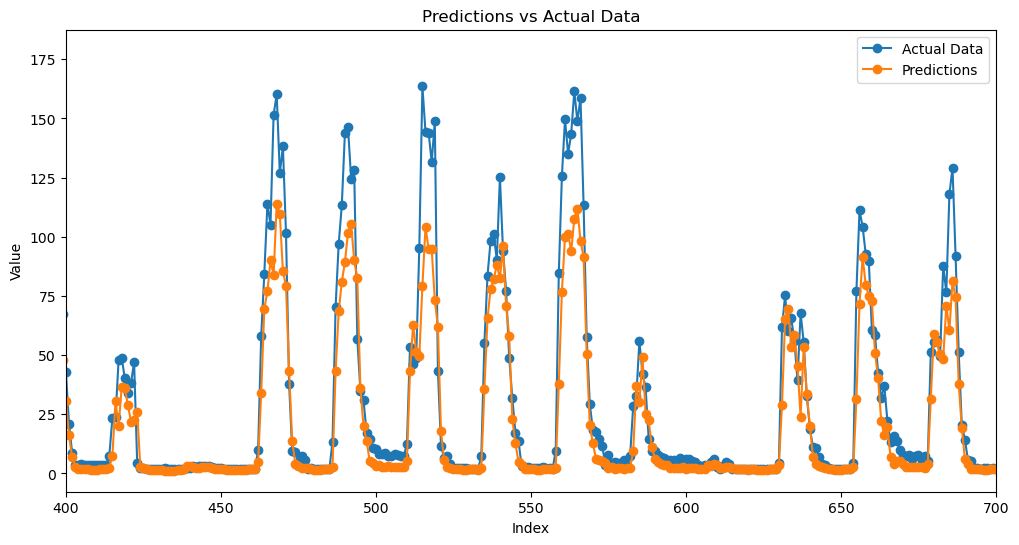

In [193]:
import matplotlib.pyplot as plt

# Flatten the arrays for plotting
nn_predictions_test_flat = nn_predictions.flatten()
#final_predictions_test_flat = final_predictions.flatten()
y_test_flat = y_val.flatten()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label='Actual Data', marker='o')
plt.plot(nn_predictions_test_flat, label='Predictions', marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predictions vs Actual Data')
plt.legend()
plt.xlim(400, 700)
plt.show()


In [164]:
#Evaluasi Error Model Neural Network

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_val.flatten(), nn_predictions.flatten())
mae = mean_absolute_error(y_val.flatten(), nn_predictions.flatten())

# Print MSE and MAE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 368.59865660089184
Mean Absolute Error (MAE): 10.445417340799217


In [166]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MAPE, RMSE, CV-RMSE, NMBE, R2
mape = np.mean(np.abs((y_val.flatten() - nn_predictions.flatten()) / y_val.flatten())) * 100
r2 = r2_score(y_val.flatten(), nn_predictions.flatten())
mse = mean_squared_error(y_val.flatten(), nn_predictions.flatten())
rmse = np.sqrt(mse)
cv_rmse = rmse / np.mean(y_val.flatten()) * 100  # CV-RMSE as a percentage
nmbe = np.mean(nn_predictions.flatten() - y_val.flatten()) / np.mean(y_val.flatten()) * 100

# Print MAPE, RMSE, CV-RMSE, NMBE, R2
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
print(f'Coefficient of Variation of RMSE (CV-RMSE): {cv_rmse}%')
print(f'Normalized Mean Bias Error (NMBE): {nmbe}%')



Mean Absolute Percentage Error (MAPE): 34.70339990939288%
Root Mean Squared Error (RMSE): 19.198923318792954
R-squared (R2): 0.8245471069833696
Coefficient of Variation of RMSE (CV-RMSE): 55.692775231610185%
Normalized Mean Bias Error (NMBE): -27.63178920340112%


In [167]:
VP_test = sqrt(np.mean((nn_predictions.flatten())**2))
#print('VP :', VP)

VA_test = sqrt(np.mean((y_val.flatten())**2))
#print('VA :', VA)

IC_test = (rmse/(VP_test+VA_test))
print('Inequality Coefficient Testing:', IC_test)

Inequality Coefficient Testing: 0.1935630030852814


In [168]:
# Calculate RMSLE
rmsle = np.sqrt(np.mean(np.square(np.log1p(nn_predictions.flatten() + 1) - np.log1p(y_val.flatten() + 1))))

# Print RMSLE
print(f'Root Mean Squared Logarithmic Error (RMSLE): {rmsle}')

Root Mean Squared Logarithmic Error (RMSLE): 0.4271111908607093
